In [6]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mdates

In [7]:
infile = 'data/t_data.csv'

df = pd.read_csv(infile, index_col=0, parse_dates=True)

In [8]:
# Formula To Obtain Ichimoku Cloud 
df['Tenkan-sen'] = (df['High'].rolling(window=9).max() + df['Low'].rolling(window=9).min()) / 2
df['Kijun-sen'] = (df['High'].rolling(window=26).max() + df['Low'].rolling(window=26).min()) / 2 
df['Senkou_Span_A'] = (df['Tenkan-sen'] + df['Kijun-sen']) / 2 
df['Senkou_Span_B'] = (df['High'].rolling(window=52).max() + df['Low'].rolling(window=52).min()) / 2 
df['Chikou_Span'] = df['Close'].shift(periods=-26) 

a = df[['Tenkan-sen']]
b = df[['Kijun-sen']]
c = df[['Chikou_Span']]
d = df[['Senkou_Span_A']]
e = df[['Senkou_Span_B']]

In [14]:
ic = [
    mpf.make_addplot(a,color='#fcc905',alpha=0.5,),
    mpf.make_addplot(b,color='#F83C78',alpha=0.5,),
    mpf.make_addplot(c,color='#8D8D16',alpha=0.8,),
    mpf.make_addplot(d,color='#006B3D',alpha=0.8,),
    mpf.make_addplot(e,color='#D3212C',alpha=0.8,),
]

In [15]:
ichimoko_fill_up = dict(y1 = df['Senkou_Span_A'].values, y2 = df['Senkou_Span_B'].values, where = df['Senkou_Span_A'] >= df['Senkou_Span_B'], alpha = 0.5, color = '#a6f7a6')
ichimoko_fill_down = dict(y1 = df['Senkou_Span_A'].values, y2 = df['Senkou_Span_B'].values, where = df['Senkou_Span_A'] < df['Senkou_Span_B'], alpha = 0.5, color = '#FC8EAC')

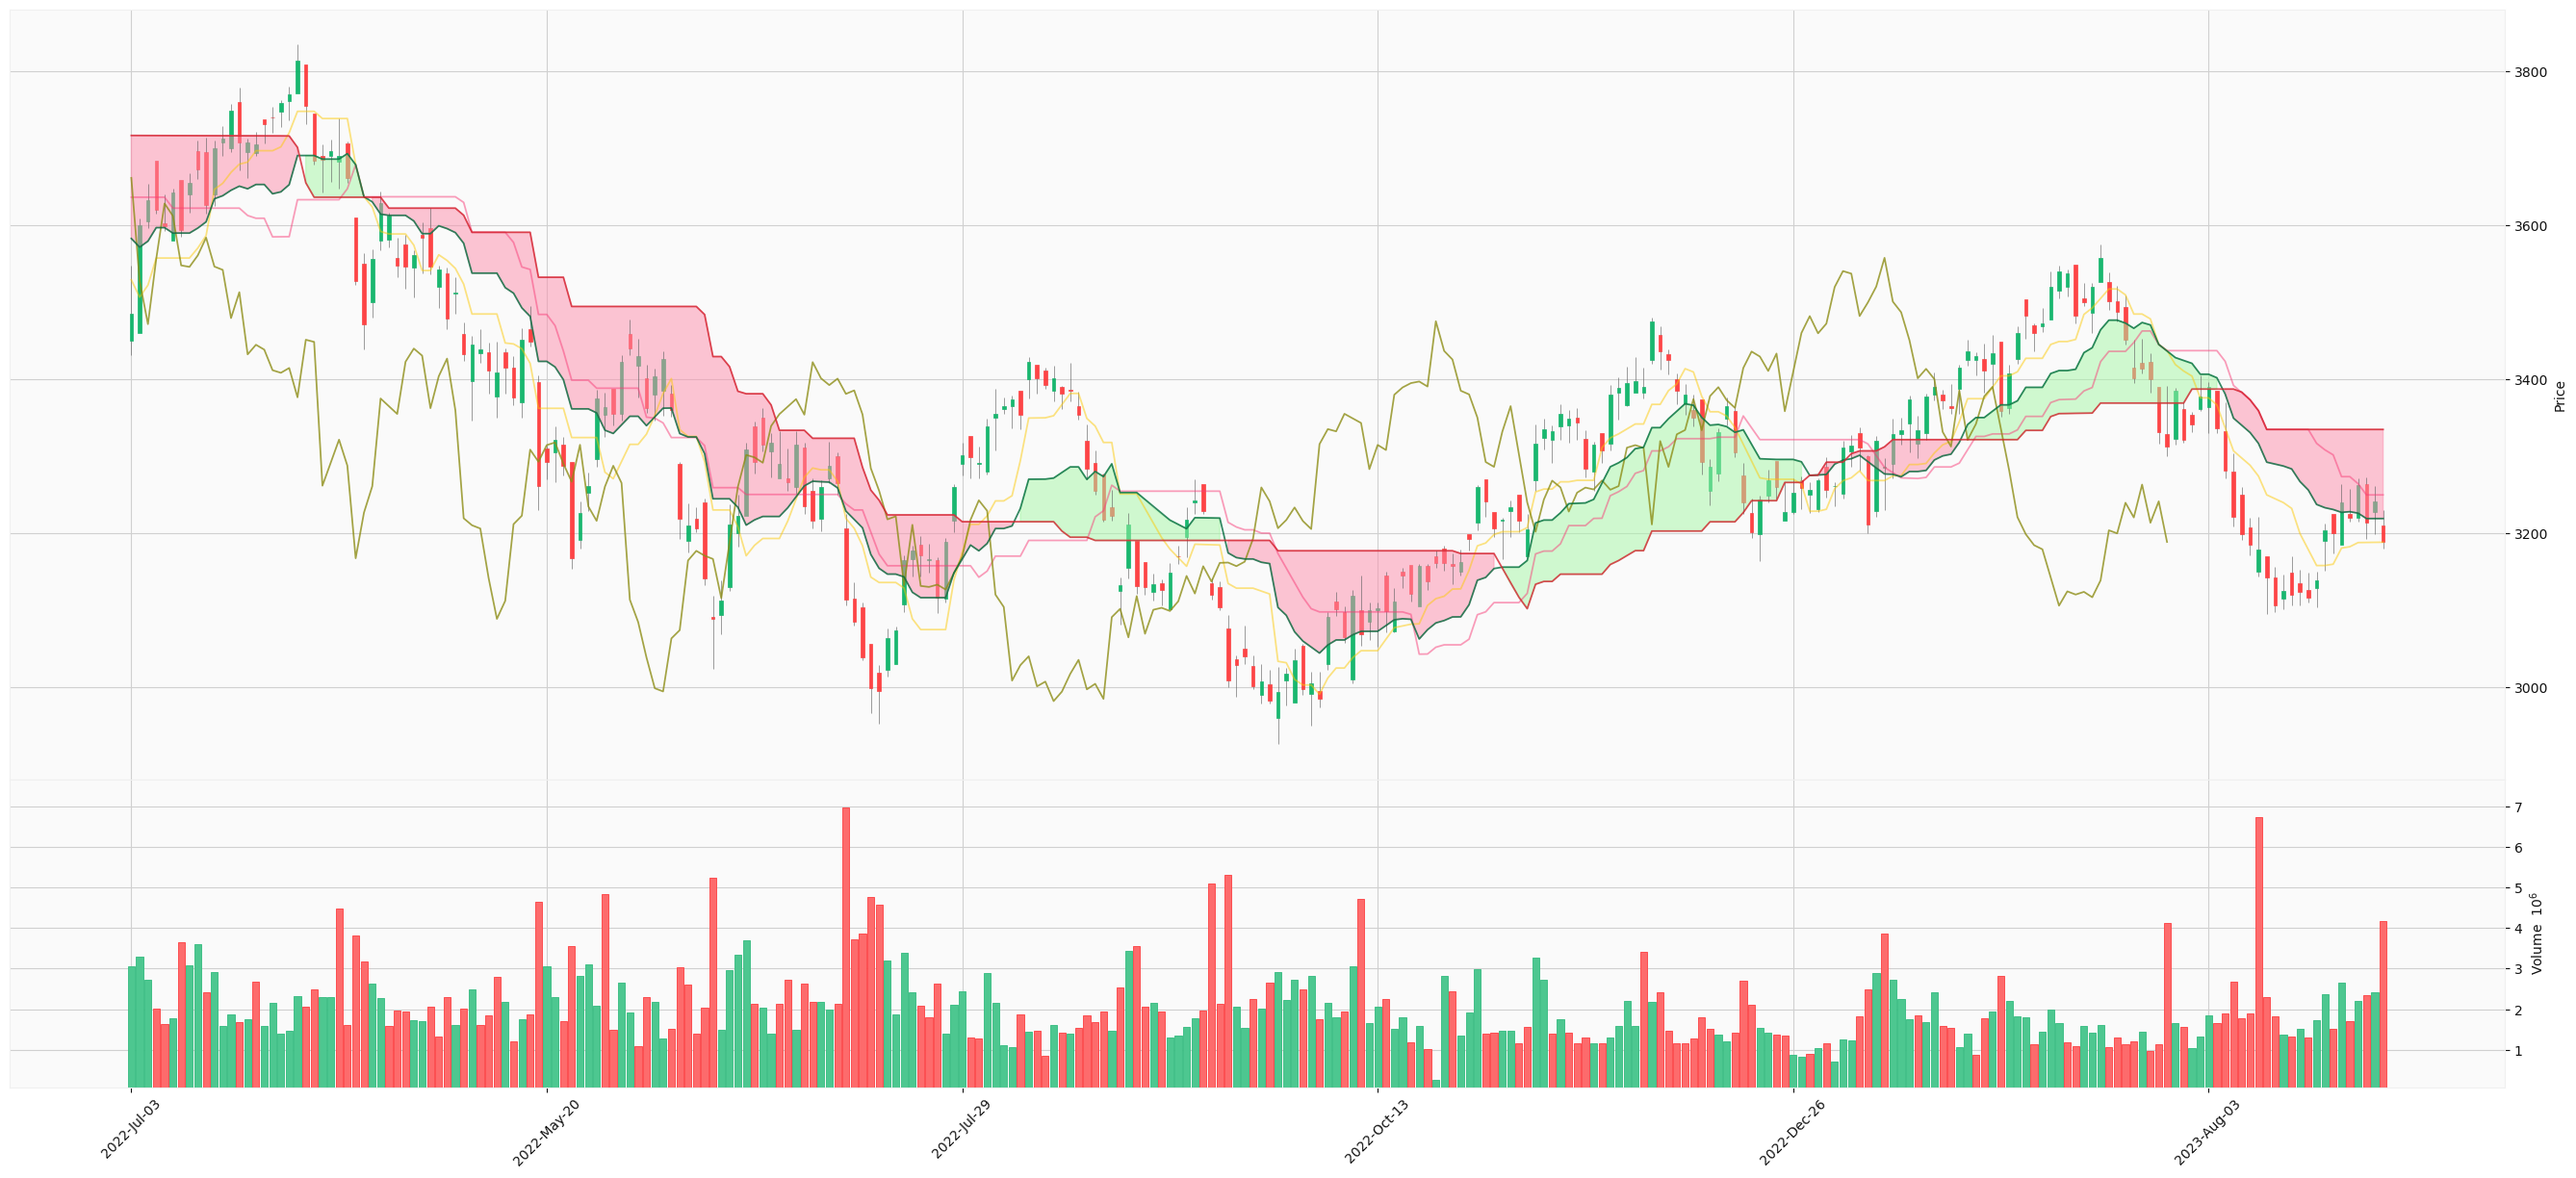

In [22]:
mpf.plot(
    df,
    volume=True,
    type="candle", 
    fill_between = [ichimoko_fill_up,ichimoko_fill_down],
    style="yahoo",
    addplot=ic,
    figscale=1.2,
    figsize=(36,16,)
)